# Загрузка Данных 

Kaggle link:https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling?resource=download

https://drive.google.com/file/d/12wiZ8IkkbO3srifx9VcGAkf1zU1M29SB/view?usp=sharing

In [1]:
! gdown --id12wiZ8IkkbO3srifx9VcGAkf1zU1M29SB

zsh:1: command not found: gdown


In [201]:
import pandas as pd
import numpy as np

In [189]:
df = pd.read_csv("/Users/olegyarygin/Projects/Data-Science/Data/churn-modelling/Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Анализ данных 

In [5]:
len(df)

10000

In [6]:
df.isna().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

Полелзные фичи 

Exited - наиболее важная переменная 

In [7]:
df["Exited"].value_counts(normalize=True) # normalize покажет сразу в процентах 

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [8]:
df["Exited"].mean()

0.2037

In [9]:
# Обучающая, валидационная и тестовая выборка: train,val, test / 60% 20% 20% 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train, test = train_test_split(df, random_state=42, train_size = 0.6, stratify= df["Exited"]) # random_state чтобы эксперимент навсегда сохранился

In [12]:
val, test = train_test_split(test, random_state=42, train_size = 0.5, stratify=test["Exited"]) # random_state чтобы эксперимент навсегда сохранился

In [13]:
train["Exited"].mean() # Защитились stratify (Стратификацией)

0.20366666666666666

In [14]:
test["Exited"].mean()

0.2035

In [15]:
val["Exited"].mean()

0.204

In [16]:
# Чем меньше выборка, тем меньше может отличаться доля от основной 

In [17]:
# stratify может защитить и обеспечить то, что в выборке будет равный параметр отточности

# Phik

In [18]:
# Подсчитать коэффициент phik для переменной Exited и тем самым отобрать наиболее важные значение по мнению phik 

In [19]:
train_full = pd.concat([train, val])

In [20]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0
6727,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1
4745,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1
1307,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0


In [21]:
import phik
from phik import resources, report

In [22]:
phik_overview = train_full.phik_matrix()

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Surname is large: 2591. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  warnings.warn(


In [23]:
phik_overview["Exited"].sort_values(ascending=False) # Exited - целевая переменная 

Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

In [24]:
# Доверять phik мы сразу не можем, поэтому построим свою модель 

# Человеческое обучение 

In [25]:
# Человеческое обучение в Классификации будет такое же как и в Регресии

In [26]:
# 1. Подсчитаем среднее по целевой переменной 

In [27]:
train_full.groupby("NumOfProducts")["Exited"].agg(["count", "mean"])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


In [28]:
# Эта переменная может быть индикатором, что клиент хочет уйти 

In [29]:
# Цель в задачи Классификации понять (отток / не уйдет 1 / 0) объект 

In [30]:
# Клиенты с 1 продуктом получают score - 0.27, с 2 - 0.07...

In [31]:
model = train_full.groupby("NumOfProducts")["Exited"].mean().reset_index() # reset_index - чтобы был сразу df 

In [32]:
model = model.rename({"Exited":"score_prod"}, axis=1)

In [33]:
model

,NumOfProducts,score_prod
0,1,0.275369
1,2,0.077049
2,3,0.826484
3,4,1.000000


In [34]:
train_full = train_full.merge(model, how="left", on="NumOfProducts")

In [35]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049


In [36]:
train_full.groupby("NumOfProducts")["Exited"].agg(["count", "mean"])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


# Baseline 

In [37]:
# Скорее всего тут будет тоже среднее 

In [38]:
train_full["Exited"].mean()

0.20375

In [39]:
train_full["score_mean"] = train_full["Exited"].mean() # Среднее по всей выборке 

In [40]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049,0.20375


In [41]:
from sklearn.metrics import log_loss

In [42]:
log_loss(train_full["Exited"], train_full["score_mean"]) # Baseline 

0.5055572860042145

In [43]:
# Теперь нам нужно получать ошибку,которая меньше этого числа 

In [44]:
log_loss(train_full["Exited"], train_full["score_prod"]) # BaseLine 

0.4359616823203511

In [45]:
# Решение на основе одной переменной уже лучше,чем Baseline 

# Uplift

In [46]:
# В дополнение к log_loss, подсчитаем еще интуитивную метрику 

In [47]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049,0.20375


In [48]:
# Худший сценарий сортировки 

In [49]:
train_full["Exited"].sample(frac=0.2, random_state=42).mean() #frac = 20% random_state= 42 чтобы зафиксировался 

0.210625

In [50]:
# Приблизительно будет равна изначальной выборке 

In [51]:
train_full["Exited"].mean()

0.20375

In [52]:
exited_all = train_full["Exited"].sum() # Количесво отточных клиентов в выборке

In [53]:
exited_all

1630

In [54]:
train_full["Exited"].sample(frac=0.2, random_state=42).sum()

337

In [55]:
train_full["Exited"].sample(frac=0.2, random_state=42).sum() / exited_all

0.2067484662576687

In [56]:
# 20 % получаем при случайной сортировки 

In [57]:
train_full = train_full.sort_values("score_prod", ascending=False)

In [58]:
round(len(train_full) * 0.2) # 20% 

1600

In [59]:
train_full.head(round(len(train_full) * 0.2))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
6946,6876,15665283,Brookes,610,France,Female,57,7,72092.95,4,0,1,113228.82,1,1.000000,0.20375
1245,3153,15724161,Sutton,644,France,Female,40,9,137285.26,4,1,0,77063.63,1,1.000000,0.20375
7056,2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1,1.000000,0.20375
7847,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,1.000000,0.20375
693,7568,15750545,Chidiebere,629,France,Male,44,5,0.00,4,0,0,117572.59,1,1.000000,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,1590,15617518,Hu,675,Germany,Male,36,7,89409.95,1,1,1,149399.70,0,0.275369,0.20375
7270,3716,15640409,Carpenter,817,Germany,Female,46,0,89087.89,1,0,1,87941.85,1,0.275369,0.20375
7287,2707,15595071,Ramos,696,France,Male,22,9,149777.00,1,1,1,198032.93,0,0.275369,0.20375
7283,9183,15665579,Cartwright,597,France,Female,28,0,142705.95,1,1,0,127233.39,0,0.275369,0.20375


In [60]:
train_full.head(round(len(train_full) * 0.2))["Exited"].sum() / exited_all

0.3576687116564417

In [61]:
# Отсортировав по score мы видим, что 37% отточников

In [62]:
0.37116564417177916 / 0.2067484662576687

1.795252225519288

In [63]:
# наша сортировка лучше чем rand в 1.79 раз 

In [64]:
# Интуитивная метрика, показывает на сколько мы превосходим Baseline 

#  Добавим Шум

In [65]:
# Всего 4 уникальных score на 8000 клиентов 

In [66]:
import numpy as np

In [67]:
np.random.seed(42)
np.random.uniform(size=len(train_full)) / 1000

array([0.00037454, 0.00095071, 0.00073199, ..., 0.00045533, 0.00090844,
       0.00010448])

In [68]:
np.random.seed(42)
train_full["score_prod"] = train_full["score_prod"] - np.random.uniform(size=len(train_full)) / 1000

In [69]:
train_full["score_prod"] # Все уникальные score

6946    0.999625
1245    0.999049
7056    0.999268
7847    0.999401
693     0.999844
          ...   
1742    0.076776
4912    0.076839
4913    0.076593
4914    0.076140
0       0.076944
Name: score_prod, Length: 8000, dtype: float64

In [70]:
train_full["score_prod"].nunique()

8000

# Функция для uplift

In [71]:
exited_all = train_full["Exited"].sum()

In [72]:
train_full = train_full.sort_values("score_prod", ascending=False)

In [73]:
train_full.head(round(len(train_full) * 0.2))["Exited"].sum() / exited_all

0.3815950920245399

In [74]:
0.3815950920245399 / 0.2 # Получили uplift До шума 

1.9079754601226995

In [75]:
def uplift(df, score, pct): 
    exited_all = train_full["Exited"].sum() # Количесво отточных клиентов в выборке
    df = df.sort_values(score, ascending=False)
    exited_found = df.head(round(len(df) * pct))["Exited"].sum()
    
    return exited_found / exited_all / pct 

In [76]:
uplift(train_full, "score_prod", 0.2) # Получили uplift с шумом 

1.9079754601226995

In [77]:
test = test.merge(model, how="left", on="NumOfProducts")

In [78]:
# Далее добавим шум 

In [79]:
np.random.seed(42)
test["score_prod"] = test["score_prod"] - np.random.uniform(size=len(test)) / 1000

In [80]:
# Подсчитаем для test loglos 

In [81]:
log_loss(train_full["Exited"], train_full["score_prod"])

0.4359717821616623

In [82]:
log_loss(test["Exited"], test["score_prod"])

0.4338658337619006

In [83]:
uplift(test, "score_prod", 0.2)

0.460122699386503

# Добавим возраст 

In [84]:
# Возьем возвраст и глянем на его распределение 

In [85]:
import matplotlib.pyplot as plt 

plt.style.use("dark_background")

<Axes: >

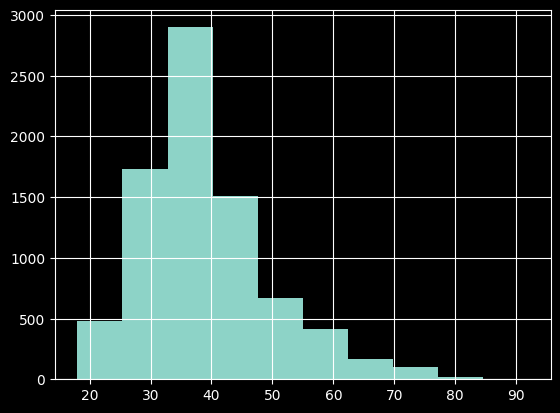

In [86]:
train_full["Age"].hist()

In [87]:
# Переменная непрерывная, соответсвено нужно побить на интервалы, чтобы группировать в модель 

In [88]:
train_full["age_group"] = pd.qcut(train_full["Age"], 5)

In [89]:
train_full.groupby("age_group")["Exited"].agg(["count", "mean"])

,count,mean
age_group,,
"(17.999, 31.0]",1896,0.075422
"(31.0, 35.0]",1424,0.091994
"(35.0, 40.0]",1797,0.146912
"(40.0, 46.0]",1376,0.289971
"(46.0, 92.0]",1507,0.459854


In [90]:
# Чем больше возвраст,тем больше доля отточных клиентов 

https://stackoverflow.com/questions/37906210/applying-pandas-qcut-bins-to-new-data

In [91]:
pd.qcut(train_full["Age"], 5, retbins=True, labels=False)

(257     3
 3036    0
 4054    3
 3202    2
 1874    0
        ..
 94      0
 5637    3
 2489    3
 584     3
 2405    0
 Name: Age, Length: 8000, dtype: int64,
 array([18., 31., 35., 40., 46., 92.]))

In [92]:
train_full["age_group"] = pd.cut(train_full["Age"], [0,31,35,40,46, float("inf")])

In [93]:
train_full.groupby("age_group")["Exited"].agg(["count", "mean"])

,count,mean
age_group,,
"(0.0, 31.0]",1896,0.075422
"(31.0, 35.0]",1424,0.091994
"(35.0, 40.0]",1797,0.146912
"(40.0, 46.0]",1376,0.289971
"(46.0, inf]",1507,0.459854


In [94]:
model = train_full.groupby(["NumOfProducts", "age_group"])["Exited"].mean().reset_index() # reset_index - чтобы был сразу df 

In [95]:
model = model.rename({"Exited":"score_prod"}, axis=1)

In [96]:
model

,NumOfProducts,age_group,score_prod
0,1,"(0.0, 31.0]",0.106774
1,1,"(31.0, 35.0]",0.135908
2,1,"(35.0, 40.0]",0.198646
3,1,"(40.0, 46.0]",0.378873
4,1,"(46.0, inf]",0.542506
5,2,"(0.0, 31.0]",0.029293
6,2,"(31.0, 35.0]",0.031206
7,2,"(35.0, 40.0]",0.059977
8,2,"(40.0, 46.0]",0.106239
9,2,"(46.0, inf]",0.225869


In [97]:
train_full = train_full.merge(model, how="left", on=["NumOfProducts", "age_group"])

In [98]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod_x,score_mean,age_group,score_prod_y
0,4512,15568006,Ukaegbunam,634,France,Female,45,2,0.00,4,1,0,101039.53,1,0.999979,0.20375,"(40.0, 46.0]",1.000000
1,4655,15593976,Swanson,578,Germany,Female,31,5,102088.68,4,0,0,187866.21,1,0.999966,0.20375,"(0.0, 31.0]",1.000000
2,4404,15616859,Bonwick,602,Germany,Female,43,2,113641.49,4,1,0,115116.35,1,0.999954,0.20375,"(40.0, 46.0]",1.000000
3,9412,15796115,Forbes,689,Germany,Female,40,4,78119.59,4,1,0,119259.34,1,0.999942,0.20375,"(35.0, 40.0]",1.000000
4,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0.999935,0.20375,"(0.0, 31.0]",1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9749,15680201,Marcelo,627,Germany,Male,24,5,102773.20,2,1,0,56793.02,1,0.076050,0.20375,"(0.0, 31.0]",0.029293
7996,3350,15603465,Dunn,665,Germany,Female,45,5,155447.65,2,1,0,51871.95,1,0.076050,0.20375,"(40.0, 46.0]",0.106239
7997,7652,15776921,Geoghegan,431,Germany,Male,45,5,83624.55,2,0,0,36899.62,0,0.076050,0.20375,"(40.0, 46.0]",0.106239
7998,7453,15636562,Muravyova,573,Spain,Male,44,8,0.00,2,0,0,62424.46,0,0.076049,0.20375,"(40.0, 46.0]",0.106239


In [99]:
# Проверим ошибку 

In [100]:
log_loss(train_full["Exited"], train_full["score_prod_x"])

0.4359717821616623

In [101]:
uplift(train_full, "score_prod_x", 0.2)

1.9079754601226995

In [102]:
# score_prod_y = score_prod_

In [103]:
log_loss(train_full["Exited"], train_full["score_prod_y"])

0.3866695862492173

In [104]:
uplift(train_full, "score_prod_y", 0.2)

2.702453987730061

In [105]:
test["age_group"] = pd.cut(test["Age"], [0,31,35,40,46, float("inf")])

In [106]:
test = test.merge(model, how="left", on=["NumOfProducts", "age_group"])

In [107]:
# Сравним на тесте 

In [108]:
log_loss(test["Exited"], test["score_prod_x"])

0.4338658337619006

In [109]:
uplift(test, "score_prod_y", 0.2)

0.6871165644171779

# Добавим IsActiveMember

In [110]:
train_full["IsActiveMember"].value_counts()

IsActiveMember
1    4131
0    3869
Name: count, dtype: int64

In [111]:
# Категориальная переменная

In [112]:
train_full.groupby("IsActiveMember")["Exited"].agg(["count", "mean"])

,count,mean
IsActiveMember,,
0,3869,0.267511
1,4131,0.144033


In [113]:
model = train_full.groupby(["NumOfProducts", "age_group", "IsActiveMember"])["Exited"].mean().reset_index() # reset_index - чтобы был сразу df) 

In [114]:
model = model.rename({"Exited":"score_prod_age_active"}, axis = 1)

In [115]:
model

,NumOfProducts,age_group,IsActiveMember,score_prod_age_active
0,1,"(0.0, 31.0]",0,0.143885
1,1,"(0.0, 31.0]",1,0.072687
2,1,"(31.0, 35.0]",0,0.177650
3,1,"(31.0, 35.0]",1,0.094286
4,1,"(35.0, 40.0]",0,0.223714
5,1,"(35.0, 40.0]",1,0.173121
6,1,"(40.0, 46.0]",0,0.466146
7,1,"(40.0, 46.0]",1,0.276074
8,1,"(46.0, inf]",0,0.793103
9,1,"(46.0, inf]",1,0.334016


In [116]:
train_full = train_full.merge(model, how="left", on=["NumOfProducts", "age_group", "IsActiveMember"])

In [117]:
test = test.merge(model, how="left", on=["NumOfProducts", "age_group", "IsActiveMember"])

In [118]:
# Проверяем metrix 

In [119]:
def print_metrix(df, score):
    print(log_loss(df["Exited"], df[score]))
    print(uplift(df, score, 0.2))

In [120]:
print_metrix(train_full, "score_prod_age_active")

0.3655019751451003
2.861963190184049


In [121]:
print_metrix(test, "score_prod_age_active")

0.3638472889481342
0.7147239263803681


# Машинное обучение 

In [122]:
from catboost import CatBoostClassifier

In [123]:
train_full.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'score_prod_x',
       'score_mean', 'age_group', 'score_prod_y', 'score_prod_age_active'],
      dtype='object')

In [124]:
X = ["NumOfProducts", "Age", "IsActiveMember"] # Фичи 
y = ["Exited"] # target 

In [125]:
params = {"verbose": 100, "random_seed": 42, "learning_rate": 0.01}

In [126]:
model = CatBoostClassifier(**params)

In [127]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

0:	learn: 0.6849803	test: 0.6849389	best: 0.6849389 (0)	total: 59.4ms	remaining: 59.4s
100:	learn: 0.3991169	test: 0.3930537	best: 0.3930537 (100)	total: 220ms	remaining: 1.96s
200:	learn: 0.3659581	test: 0.3563817	best: 0.3563817 (200)	total: 377ms	remaining: 1.5s
300:	learn: 0.3589224	test: 0.3476566	best: 0.3476566 (300)	total: 593ms	remaining: 1.38s
400:	learn: 0.3565171	test: 0.3446648	best: 0.3446648 (400)	total: 787ms	remaining: 1.18s
500:	learn: 0.3553274	test: 0.3433005	best: 0.3432984 (498)	total: 950ms	remaining: 946ms
600:	learn: 0.3544987	test: 0.3425379	best: 0.3425379 (600)	total: 1.13s	remaining: 748ms
700:	learn: 0.3539638	test: 0.3421168	best: 0.3421135 (699)	total: 1.29s	remaining: 550ms
800:	learn: 0.3532817	test: 0.3419139	best: 0.3419139 (800)	total: 1.45s	remaining: 359ms
900:	learn: 0.3524351	test: 0.3416923	best: 0.3416923 (900)	total: 1.59s	remaining: 175ms
999:	learn: 0.3513546	test: 0.3417688	best: 0.3416551 (927)	total: 1.76s	remaining: 0us

bestTest = 0.34

In [128]:
# Функция логистический потерь тут будет log_los 

In [129]:
# В человеческом обучение 0.36, а тут у нас 0.34 - CatBoost Win 

In [130]:
# Теперь подсчитаем качество на test 

In [131]:
# predict преобразует score в класс, используя дефолтный порог

0.5

In [132]:
model.predict(test[X])

array([0, 0, 0, ..., 0, 0, 0])

In [133]:
model.predict_proba(test[X]) # первый столбец score на 0 класс, второй - score на отток 

array([[0.87273278, 0.12726722],
       [0.83992875, 0.16007125],
       [0.76421314, 0.23578686],
       ...,
       [0.85243229, 0.14756771],
       [0.96002386, 0.03997614],
       [0.95396298, 0.04603702]])

In [134]:
test["score_cat_prod_age_active"] = model.predict_proba(test[X])[:,1]

In [135]:
test["score_cat_prod_age_active"].nunique()

254

In [136]:
len(test)


2000

In [137]:
print_metrix(test, "score_prod_age_active") # Человеческое обучение 

0.3638472889481342
0.7147239263803681


In [138]:
print_metrix(test, "score_cat_prod_age_active") # Машинное  обучение

0.35878132799643003
0.7239263803680981


# Обучаемся на всех фичах

In [139]:
train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [140]:
train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1468,15681843,Barbour,624,Germany,Female,35,0,180303.24,2,1,0,163587.90,0
4644,4645,15714240,Ponomarev,712,Spain,Male,74,5,0.00,2,0,0,151425.82,0
8942,8943,15709780,Azuka,667,France,Female,37,9,71786.90,2,1,1,67734.79,0
2935,2936,15689425,Olejuru,687,Spain,Male,35,8,100988.39,2,1,0,22247.27,0


In [141]:
train.select_dtypes(include="object") # Чаще всего это и есть категориальные фичи

,Surname,Geography,Gender
6851,Cantamessa,Germany,Female
7026,Horton,France,Female
5705,Doherty,Germany,Male
9058,Moran,Spain,Female
9415,Hunt,Germany,Female
...,...,...,...
1467,Barbour,Germany,Female
4644,Ponomarev,Spain,Male
8942,Azuka,France,Female
2935,Olejuru,Spain,Male


In [167]:
# Список фичей 

X = ['CreditScore', 'Age', 'Tenure', 'Balance', 
     'NumOfProducts', "Geography", "Gender", 'HasCrCard','IsActiveMember', 
     'EstimatedSalary']

cat_features = ['Geography','Gender']

y = ['Exited']

In [168]:
# Создаем новую модель

Пример как это можно еще сделать 

https://www.kaggle.com/code/mitribunskiy/tutorial-catboost-overview

In [175]:
from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 )
params = {"verbose": 100, 
          "random_seed": 42}

model = CatBoostClassifier(**params)
model.fit(train_data, eval_set=valid_data)

Learning rate set to 0.04933
0:	learn: 0.6512580	test: 0.6512580	best: 0.6512580 (0)	total: 8.17ms	remaining: 8.16s
100:	learn: 0.3131074	test: 0.3134507	best: 0.3134507 (100)	total: 376ms	remaining: 3.35s
200:	learn: 0.2880998	test: 0.2894069	best: 0.2894069 (200)	total: 737ms	remaining: 2.93s
300:	learn: 0.2639684	test: 0.2655380	best: 0.2655380 (300)	total: 1.15s	remaining: 2.67s
400:	learn: 0.2424780	test: 0.2440925	best: 0.2440925 (400)	total: 1.58s	remaining: 2.36s
500:	learn: 0.2253429	test: 0.2271230	best: 0.2271230 (500)	total: 2s	remaining: 1.99s
600:	learn: 0.2105322	test: 0.2126195	best: 0.2126195 (600)	total: 2.46s	remaining: 1.63s
700:	learn: 0.1970211	test: 0.1992838	best: 0.1992838 (700)	total: 2.94s	remaining: 1.25s
800:	learn: 0.1846822	test: 0.1873332	best: 0.1873332 (800)	total: 3.39s	remaining: 842ms
900:	learn: 0.1738631	test: 0.1765889	best: 0.1765889 (900)	total: 3.86s	remaining: 424ms
999:	learn: 0.1644314	test: 0.1673928	best: 0.1673928 (999)	total: 4.33s	rema

In [ ]:
# Теперь посмотрим на test

In [177]:
test["score_cat_prod_age_active_all_features"] = model.predict_proba(test[X])[:,1]

In [178]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod_x,age_group,score_prod_y,score_prod_age_active,score_cat_prod_age_active,score_cat_prod_age_active_all_features
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267,0.067425
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.051238
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787,0.096774
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.030003
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859,0.022535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048,0.052185,0.009830
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121,0.127713,0.067257
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262,0.147568,0.088670
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353,0.039976,0.075237


In [179]:
print_metrix(test, "score_cat_prod_age_active") # 3 features catboos

0.35878132799643003
0.7239263803680981


In [180]:
print_metrix(test, "score_cat_prod_age_active_all_features") # all features 

0.3510938756129249
0.7668711656441718


# Feature importances

In [181]:
model.get_feature_importance(prettified=True) # Оценка важности фичей 

,Feature Id,Importances
0,Age,18.596375
1,Balance,15.086416
2,EstimatedSalary,14.472208
3,NumOfProducts,13.991773
4,CreditScore,12.885724
5,Geography,7.986351
6,Tenure,6.933700
7,IsActiveMember,5.139541
8,Gender,3.327503
9,HasCrCard,1.580409


In [182]:
phik_overview["Exited"].sort_values(ascending=False)

Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

# Shap

Посмотрим как каждая фича влияет на score, в какую сторону двигает score каждая фича

https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Catboost%20tutorial.html

In [183]:
import shap

In [184]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


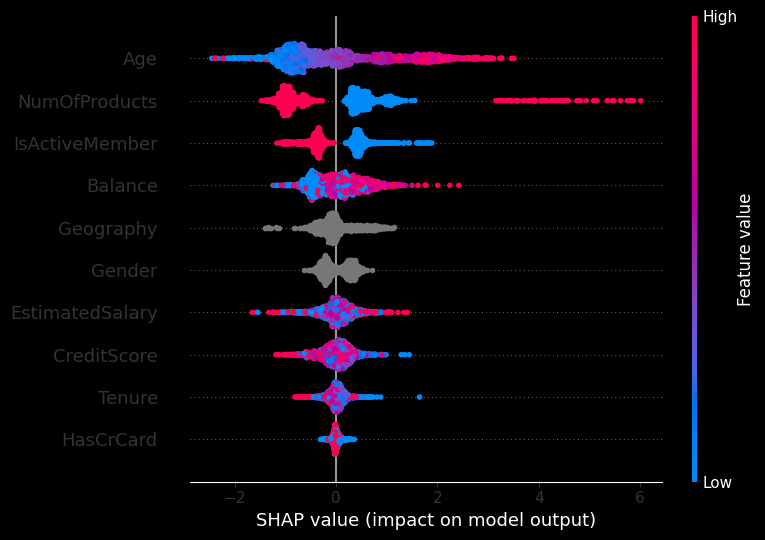

In [185]:
shap.summary_plot(shap_values, test[X])

In [186]:
train_full.groupby("NumOfProducts")["Exited"].agg(["count", "mean"])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


Посмотрим на каждую фичу по отдельности  

# Dependence plot 

In [ ]:
shap.dependence_plot("NumOfProducts", shap_values, test[X])

# Классификация == Регрессия (технически)

In [208]:
model.predict(test[X], prediction_type="RawFormulaVal")

array([-2.62693551, -2.91867279, -2.23359551, ..., -2.32998333,
       -2.50889367, -3.70266255])

In [216]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [217]:
pd.Series(model.predict(test[X], prediction_type="RawFormulaVal")).apply(sigmoid)

0       0.067425
1       0.051238
2       0.096774
3       0.030003
4       0.022535
          ...   
1995    0.009830
1996    0.067257
1997    0.088670
1998    0.075237
1999    0.024064
Length: 2000, dtype: float64

In [218]:
model.predict_proba(test[X])

array([[0.93257511, 0.06742489],
       [0.94876182, 0.05123818],
       [0.90322609, 0.09677391],
       ...,
       [0.91132999, 0.08867001],
       [0.92476295, 0.07523705],
       [0.97593559, 0.02406441]])